**Movie Rating Prediction**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [41]:
df= pd.read_csv('/content/IMDb Movies India.csv',encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [42]:
df.shape

(15509, 10)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**EDA**

Missing Datas

In [44]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [45]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum() / len(df) * 100, 2)).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['Missing Count', 'Missing Percentage'])
missing_data


,Missing Count,Missing Percentage
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


In [46]:
df.dropna(subset=['Rating'], inplace=True)

missing_percent = (round(df.isnull().sum() / len(df) * 100, 4)).sort_values(ascending=False)
print(missing_percent)

Duration    26.1144
Actor 3      3.6873
Actor 2      2.5256
Actor 1      1.5785
Genre        1.2880
Director     0.0631
Name         0.0000
Year         0.0000
Rating       0.0000
Votes        0.0000
dtype: float64


In [47]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [48]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [49]:
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [50]:
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
df['Year'] = year_lst

In [51]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 649.5+ KB


In [52]:
df['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988, 1995,
       1987, 1999, 1973, 1968, 1953, 1986, 1982, 1977, 1950, 1969, 1948,
       1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971, 1978, 1944, 1963,
       1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964, 1952,
       1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983,
       1936, 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931,
       1943, 1917, 1939, 1934])

In [53]:
(df['Duration']>180).sum()

113

In [54]:
(df['Duration']<60).sum()

27

In [55]:
df[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration,Votes
count,7558.000000,7558.000000,7558.000000
mean,5.811127,133.439124,2029.123842
std,1.368255,21.908841,11868.695754
min,1.100000,21.000000,5.000000
50%,6.000000,133.439124,61.000000
75%,6.800000,144.000000,456.000000
80%,7.000000,149.000000,797.600000
90%,7.400000,160.000000,3182.900000
95%,7.800000,169.000000,8662.150000
98%,8.200000,180.000000,21935.900000


<ipython-input-56-ddd93c71405b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'])


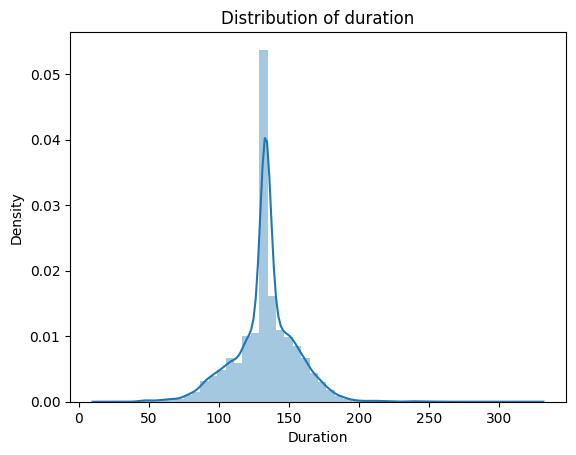

In [56]:
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

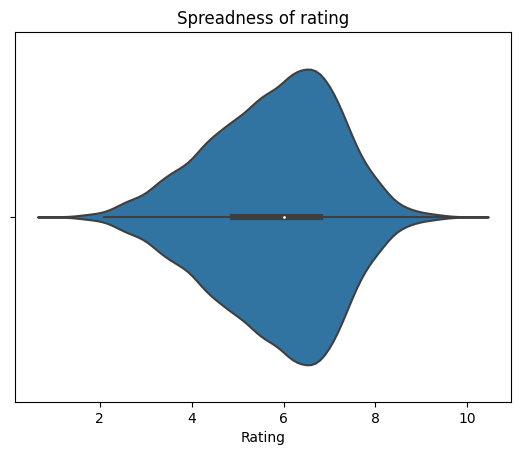

In [57]:
sns.violinplot(x=df['Rating'])
plt.title('Spreadness of rating')
plt.show()

<ipython-input-58-32fb841ddc43>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


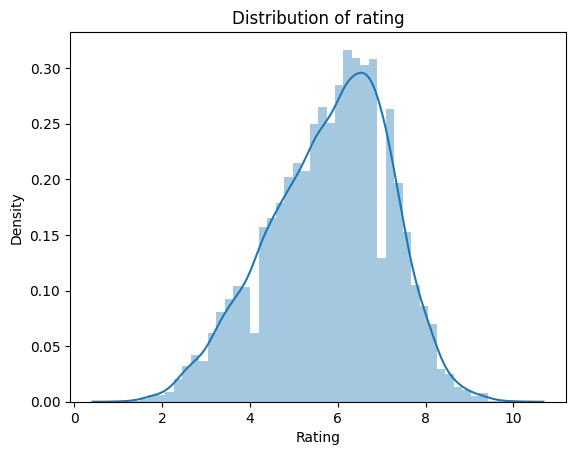

In [58]:
sns.distplot(df['Rating'])
plt.title('Distribution of rating')
plt.show()

In [59]:
df[df['Votes']>100000]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3410,Dangal,2016,161.0,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
3829,Dil Bechara,2020,101.0,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid
4848,Gandhi,1982,191.0,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
8035,Lagaan: Once Upon a Time in India,2001,224.0,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
8219,Life of Pi,2012,127.0,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8228,Like Stars on Earth,2007,165.0,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
8233,Lion,2016,118.0,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
9764,My Name Is Khan,2010,165.0,Drama,8.0,101014,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon
10882,PK,2014,153.0,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt


In [60]:
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()

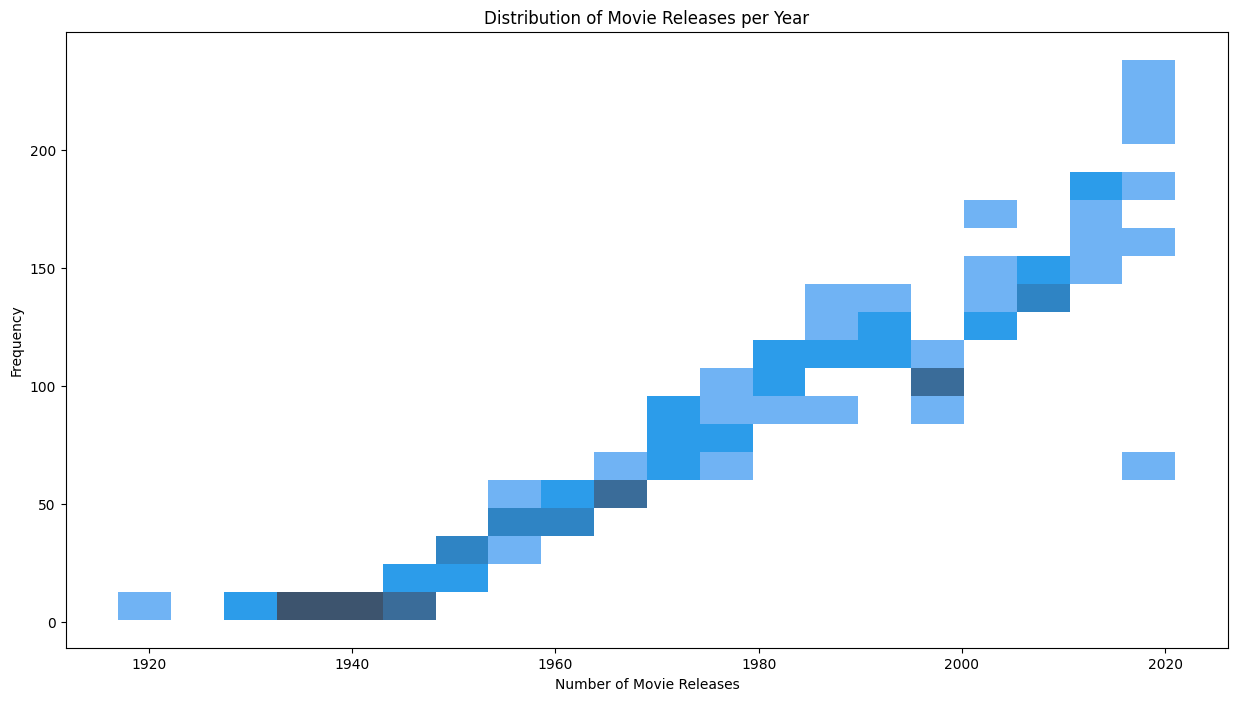

In [61]:
plt.figure(figsize=(15, 8))
sns.histplot(data=year_count, x='Year', y='count',bins=20, kde=True)
plt.title('Distribution of Movie Releases per Year')
plt.xlabel('Number of Movie Releases')
plt.ylabel('Frequency')
plt.show()

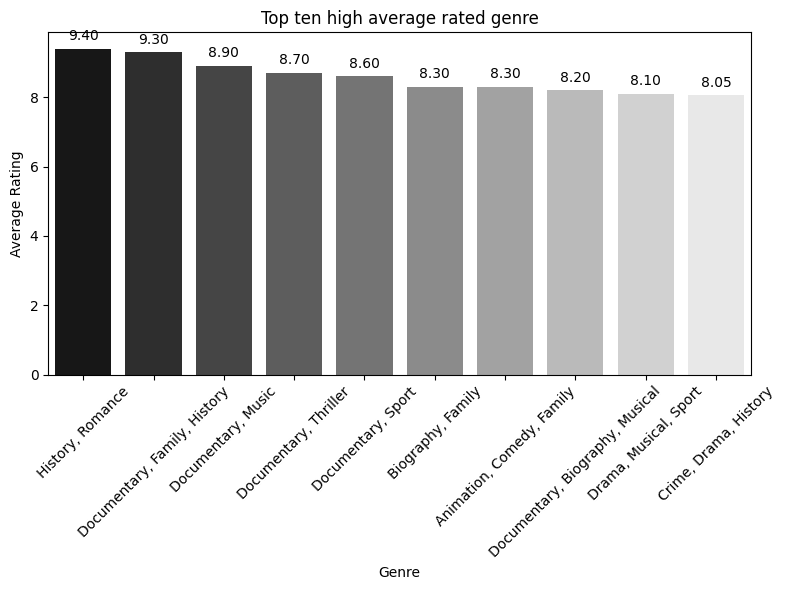

In [62]:
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False).reset_index().head(10)

plt.figure(figsize=(8, 6))


ax = sns.barplot(data=genre_rate, y='Rating', x='Genre', palette='gist_gray')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')


plt.title('Top ten high average rated genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

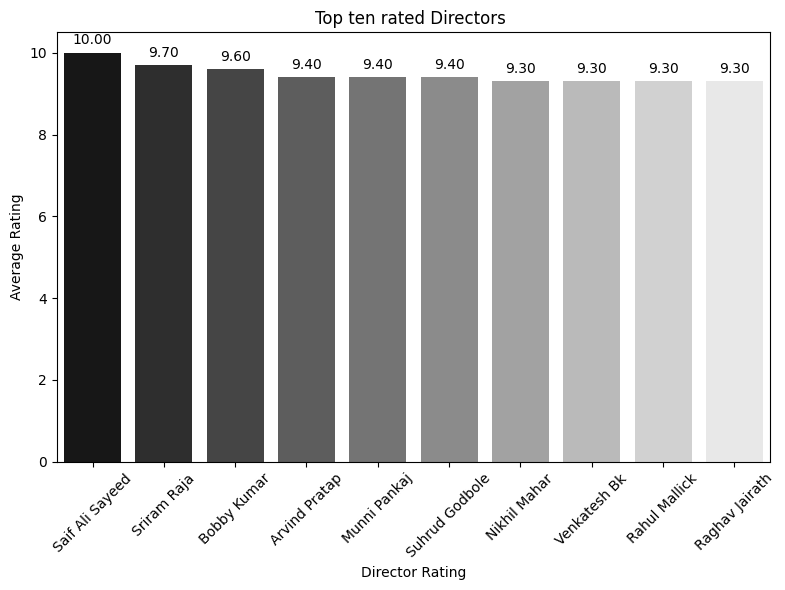

In [63]:
director_rate = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

plt.figure(figsize=(8, 6))


ax = sns.barplot(data=director_rate, y='Rating', x='Director', palette='gray')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')


plt.title('Top ten rated Directors ')
plt.xlabel('Director Rating')
plt.ylabel('Average Rating')


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

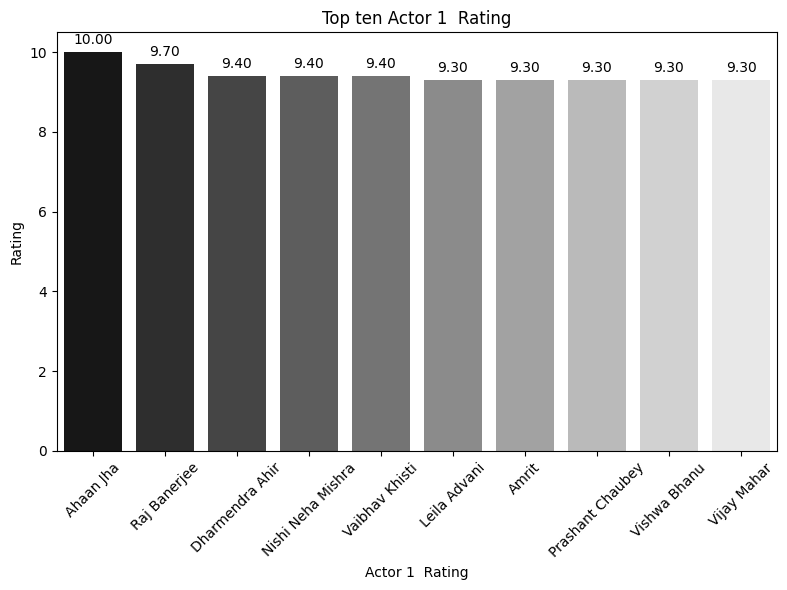

In [64]:
actor1_rate = df.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)
plt.figure(figsize=(8, 6))


ax = sns.barplot(data=actor1_rate, y='Rating', x='Actor 1', palette='gray')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')


plt.title('Top ten Actor 1  Rating')
plt.xlabel('Actor 1  Rating')
plt.ylabel('Rating')


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

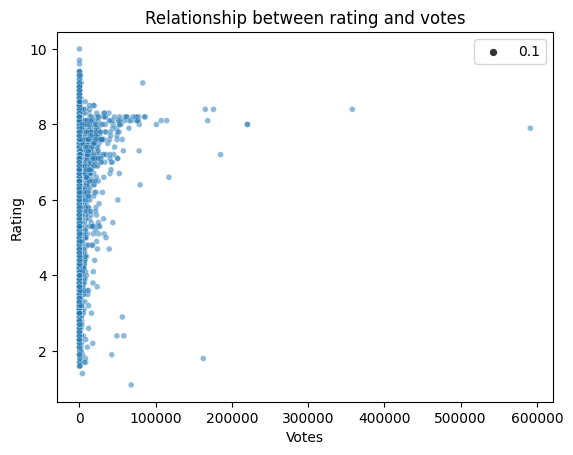

In [65]:
sns.scatterplot(data=df, x='Votes', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and votes')
plt.show()

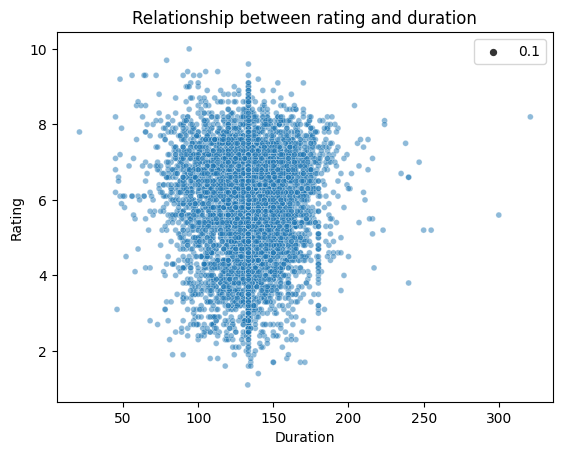

In [66]:
sns.scatterplot(data=df, x='Duration', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and duration')
plt.show()

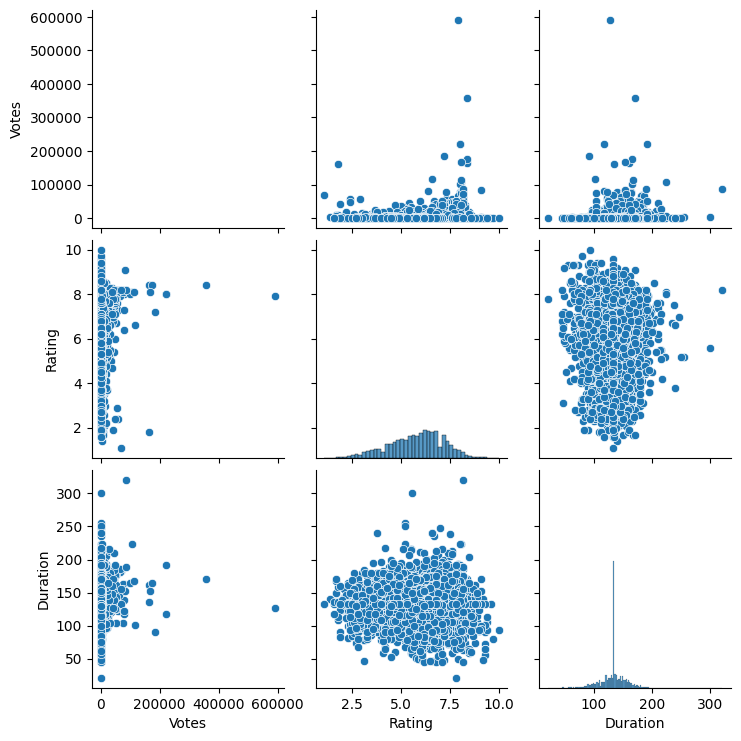

In [67]:
sns.pairplot(df[['Votes', 'Rating', 'Duration']]);

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 649.5+ KB


In [69]:
categorical_vars = ['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre']

encoding_maps = {}

for var in categorical_vars:
    encoding_map = df.groupby(var)['Rating'].mean().to_dict()
    encoding_maps[var] = encoding_map

In [70]:
df['actor1_encoded'] = round(df['Actor 1'].map(encoding_maps['Actor 1']), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(encoding_maps['Actor 2']), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(encoding_maps['Actor 3']), 1)
df['director_encoded'] = round(df['Director'].map(encoding_maps['Director']), 1)
df['genre_encoded'] = round(df['Genre'].map(encoding_maps['Genre']), 1)

In [71]:
df.drop(['Name','Actor 1','Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
df.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5


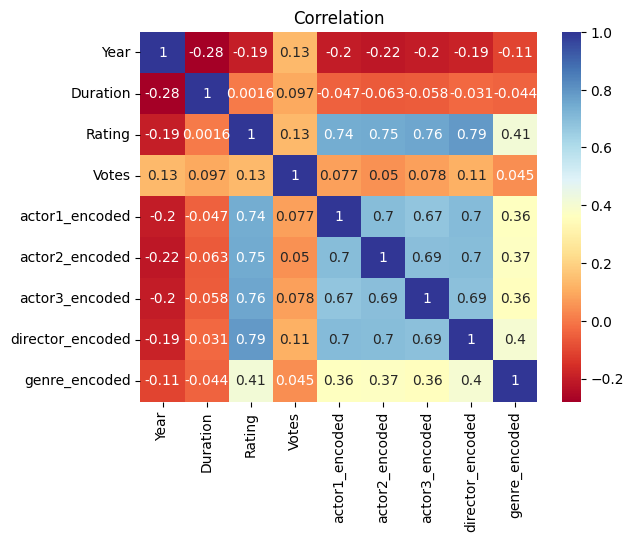

In [72]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [73]:
X = df.drop('Rating', axis=1)
y = df['Rating']

X.head()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,326,5.6,5.9,5.6,5.6,5.5


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
print('Shape of training features: ', X_train.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (6046, 8)
Shape of training target:  (6046,)
Shape of testing features:  (1512, 8)
Shape of testing target:  (1512,)


**Model Construction & Evaluation**

In [76]:
LR = LinearRegression()
LR.fit(X_train, y_train)

print('Coefficient of determination: ', LR.score(X_train, y_train))
y_pred_LR = LR.predict(X_test)

Coefficient of determination:  0.7613579123839522


In [77]:
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': y_test - y_pred_LR}
                      )
results.head()

,actual,predicted,residual
6241,7.4,6.617484,0.782516
3321,4.9,5.485182,-0.585182
6117,6.5,6.324062,0.175938
5975,5.7,5.552979,0.147021
6653,7.0,6.973330,0.026670


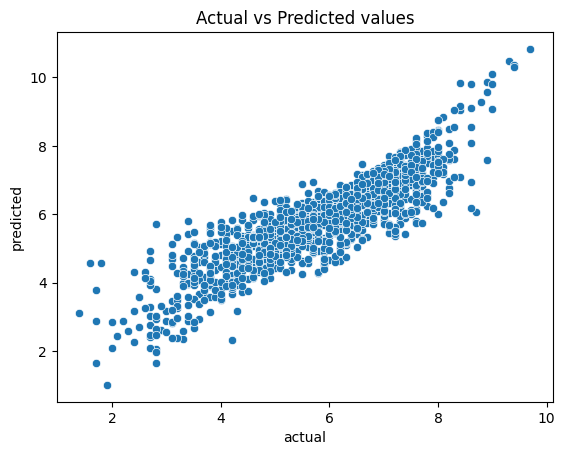

In [78]:
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

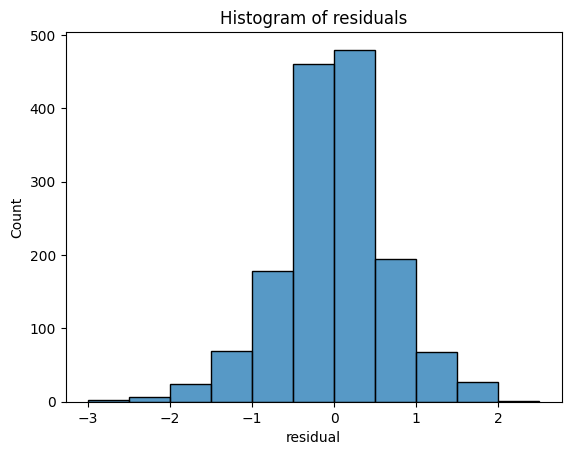

In [79]:
sns.histplot(results['residual'], bins=np.arange(-3,3,0.5))
plt.title('Histogram of residuals')
plt.show()

In [80]:
results['residual'].mean()

-0.0029143071545875408

Linear Regression

In [81]:
LR_cv = LinearRegression()

k = 5 # Number of folds
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(LR_cv, X, y, cv=cv, scoring='r2')

print("R^2 scores:", scores)
print("Mean R^2:", scores.mean())
print("Standard Deviation of R^2:", scores.std())

R^2 scores: [0.75805291 0.7593615  0.76172776 0.75988008 0.76146141]
Mean R^2: 0.7600967351040422
Standard Deviation of R^2: 0.0013628876140524494


Decision Tree

In [82]:
tree = DecisionTreeRegressor(random_state=0)
# Define the hyperparameter grid
param_grid = {'max_depth': [None, 10, 20, 30]}
# Create a grid search object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='r2')
# Fit the grid search to your data
grid_search_tree.fit(X_train, y_train)

grid_search_tree.best_params_

{'max_depth': 10}

In [83]:
y_pred_tree = grid_search_tree.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_tree))
print('MAE: ',mean_absolute_error(y_test, y_pred_tree))
print('MSE: ', mean_squared_error(y_test, y_pred_tree))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_tree)))

R^2:  0.707626058940163
MAE:  0.5106472740736313
MSE:  0.5417213695856643
RMSE:  0.7360172345710828




*  The years 1948, 1940, and 1950 had high average movie ratings.
*  The trend of the number of movie releases per year has increased from 1917 to 2020.

**The top rated genres are:**

* (History, Romance)
* (Documentary, History, Family)
* (Documentary, Music)

**The top rated directors are:**
* Saif Ali Sayeed
* Sriram Raja
* Bobby Kumar

**The top rated actors are:**


* Ahaan Jha
* Raj Banerjee
* Dharmendra Ahir


**Insights about relation:**
* Movie rating and movie votes are not highly correlated.
* There is no correlation between movie rating and movie duration.
* The linear regression model results in an R^2 of 0.758 on the test data.
* The linear regression model after cross-validation results in an R^2 of 0.76.
*The decision tree model results in an R^2 of 0.70 on the test data.







                                                        **Thank you!!**